In [5]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def display_image(image):
    # cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # cv2.imshow('image',image)
    plt.imshow(image,cmap='gray')

# Ex1

In [64]:
#read image and convert color to RGB
img_original = cv2.imread('./bonn.png')
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

In [71]:
def integral_img_own(img):
    integral_img = np.zeros((img.shape[0]+1, img.shape[1]+1), dtype=np.uint32)
    for i in range(1, img.shape[0]):
        for j in range(1, img.shape[1]):
            integral_img[i, j] = img[i-1, j-1] + integral_img[i-1, j] + integral_img[i, j-1] - integral_img[i-1, j-1]
    return integral_img

0


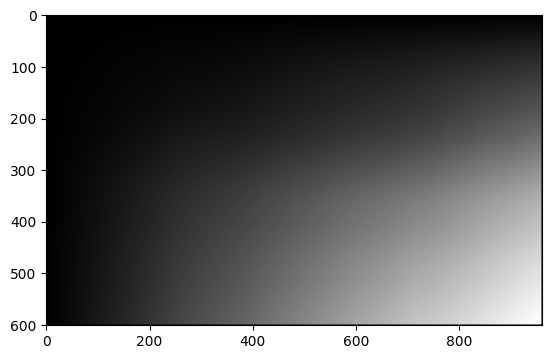

In [66]:
img_gray = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)
integral_img = integral_img_own(img_gray)
display_image(integral_img)
print(integral_img[0,0])

(601, 961)


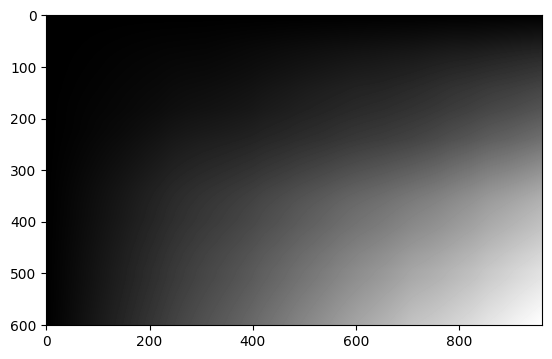

In [67]:
integral_img = cv2.integral(img_gray)
display_image(integral_img)
print(integral_img.shape)

In [80]:
def mean_gray_sum(img=None,x=0,y=0,w=100,h=100, integral_img=None):
    res = 0
    img = img.astype(np.uint32)
    w = min(x+w,img.shape[0])
    h = min(y+h,img.shape[1])
    for i in range(x, w):
        for j in range(y, h):
            res += img[i, j]
    return res / (w-x) / (h-y)
def mean_gray_integral_CV(img=None,x=0,y=0,w=100,h=100, integral_img=None):
    if integral_img is None:
        integral_img  = cv2.integral(img)
    w = min(w, img.shape[0]-x)
    h = min(h, img.shape[1]-y)
    return (integral_img[x+w, y+h] - integral_img[x, y+h] - integral_img[x+w, y] + integral_img[x, y]) / w / h
def mean_gray_integral_own(img=None,x=0,y=0,w=100,h=100, integral_img=None):
    if integral_img is None:
        integral_img = integral_img_own(img)
    w = min(w, img.shape[0]-x)
    h = min(h, img.shape[1]-y)
    return (integral_img[x+w, y+h] - integral_img[x, y+h] - integral_img[x+w, y] + integral_img[x, y]) / w / h
print(mean_gray_sum(img_gray))
print(mean_gray_integral_CV(img_gray))
print(mean_gray_integral_own(img_gray))


76.6396
76.6396
76.6396


In [78]:
def getRunTime(func,coords, img_gray,integral_func = None):
    import time
    start = time.time()
    if integral_func is not None:
        integral_img = integral_func(img_gray)
    else:
        integral_img = None
    for x,y in coords:
        func(img=img_gray,x=x,y=y,integral_img=integral_img)
    end = time.time()
    return end-start

In [86]:
random_coordinate_list = [(np.random.randint(0, img_gray.shape[0]-100), np.random.randint(0, img_gray.shape[1]-100)) for i in range(7)]
print(getRunTime(mean_gray_sum, random_coordinate_list,img_gray,None))
print(getRunTime(mean_gray_integral_CV, random_coordinate_list,img_gray,cv2.integral))
print(getRunTime(mean_gray_integral_own, random_coordinate_list,img_gray,integral_img_own))

0.015228271484375
0.0
0.4544341564178467


C:\Users\pomec\AppData\Local\Temp\ipykernel_32388\4039683297.py:21: RuntimeWarning: overflow encountered in scalar subtract
  return (integral_img[x+w, y+h] - integral_img[x, y+h] - integral_img[x+w, y] + integral_img[x, y]) / w / h
C:\Users\pomec\AppData\Local\Temp\ipykernel_32388\4039683297.py:21: RuntimeWarning: overflow encountered in scalar add
  return (integral_img[x+w, y+h] - integral_img[x, y+h] - integral_img[x+w, y] + integral_img[x, y]) / w / h


# Ex 2

In [4]:
#Ex 2
img = cv2.imread('./bonn.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


In [5]:
def equalize_histogram(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    img2 = cdf[img]
    return img2

In [3]:
def max_abs_pixel_diff(img1, img2):
    return np.max(np.abs(img1 - img2))

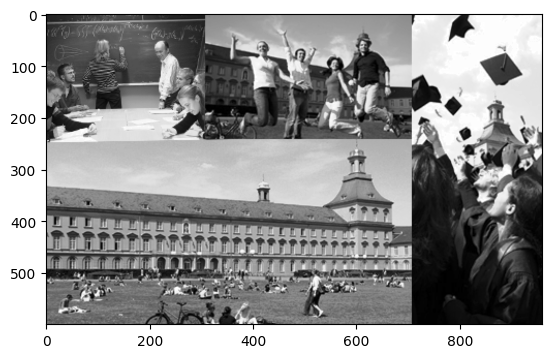

In [6]:
img_eq = equalize_histogram(img_gray)
display_image(img_eq)

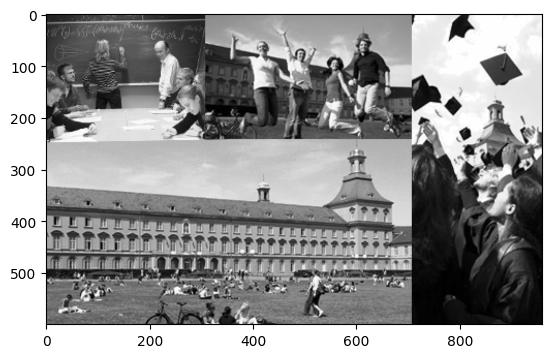

In [7]:
img_eq_cv = cv2.equalizeHist(img_gray)
display_image(img_eq_cv)

# Ex 4


In [7]:
img = cv2.imread('./bonn.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    return kernel 

In [9]:
def min_max_normalize(img):
    img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
    img = img.astype(np.int32)
    return img

[[ 40  38  38 ... 247 249 249]
 [ 40  40  38 ... 247 247 249]
 [ 40  40  38 ... 247 247 247]
 ...
 [114 114 114 ...   5   5   5]
 [119 119 117 ...   5   5   5]
 [119 119 117 ...   5   5   5]]


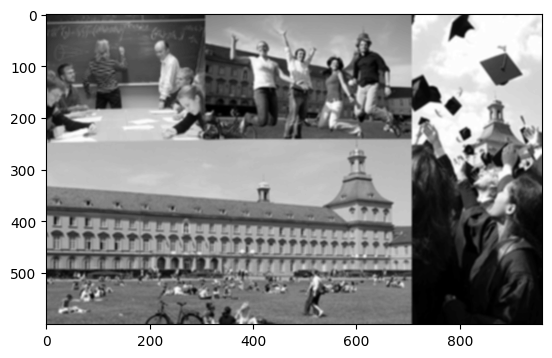

In [10]:
gk = gaussian_kernel(5, 2*np.sqrt(2))
img_blur = cv2.filter2D(img_gray, -1, gk)
img_blur = min_max_normalize(img_blur)
display_image(img_blur)
print(img_blur)

[[ 40  40  38 ... 248 249 249]
 [ 40  40  38 ... 248 249 249]
 [ 41  40  38 ... 247 248 248]
 ...
 [116 116 116 ...   5   5   5]
 [119 119 117 ...   5   5   5]
 [119 119 118 ...   5   5   5]]


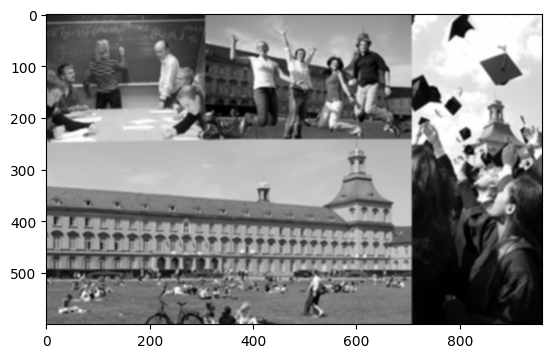

In [11]:
img_blur_cv = cv2.GaussianBlur(img_gray, (5, 5), 2*np.sqrt(2))
img_blur_cv = min_max_normalize(img_blur_cv)
display_image(img_blur_cv)
print(img_blur_cv)

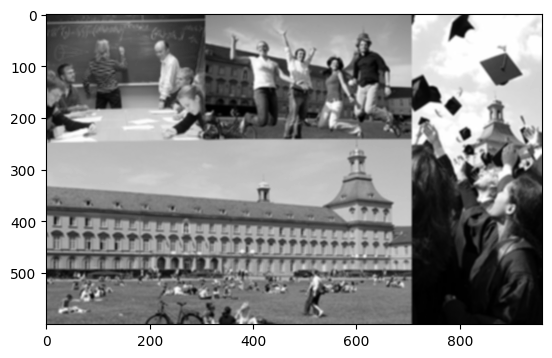

In [12]:
def gaussian_kernel_1d(size, sigma):
    kernel = np.fromfunction(lambda x: (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-((x-size//2)**2)/(2*sigma**2)), (size,))
    return kernel / np.sum(kernel)
kernel_x = gaussian_kernel_1d(5, 2*np.sqrt(2))
kernel_y = np.reshape(kernel_x, (5, 1))
img_blur_sep = cv2.sepFilter2D(img_gray, -1, kernel_x, kernel_y)
img_blur_sep = min_max_normalize(img_blur_sep)
display_image(img_blur_sep)

In [19]:
#max absolute pixel difference
print(max_abs_pixel_diff(img_blur, img_blur_cv))
print(max_abs_pixel_diff(img_blur_sep, img_blur_cv))
print(max_abs_pixel_diff(img_blur, img_blur_sep))

3
1
3


# Ex 5

In [14]:
img = cv2.imread('./bonn.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

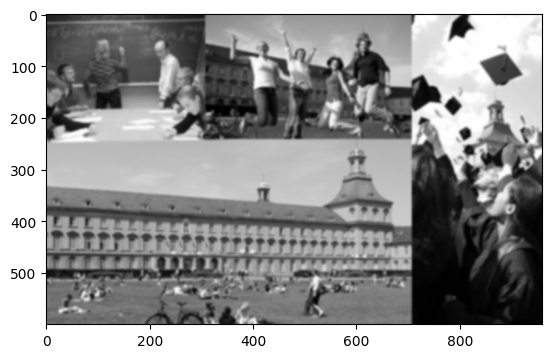

In [17]:
img_blur_2 = cv2.GaussianBlur(img_gray, (5, 5), 2)
img_blur_2 = cv2.GaussianBlur(img_blur_2, (5, 5), 2)
display_image(img_blur_2)

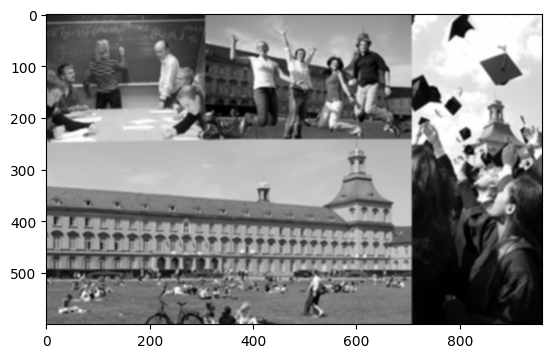

In [18]:
img_blur_1 = cv2.GaussianBlur(img_gray, (5, 5), 2*np.sqrt(2))
display_image(img_blur_1)

In [21]:
print(max_abs_pixel_diff(img_blur_2.astype(np.int32), img_blur_1.astype(np.int32)))

29


# Ex 7

In [22]:
img = cv2.imread('./bonn.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ker_size = [[1,1],[3,3],[5,5],[7,7],[9,9]]

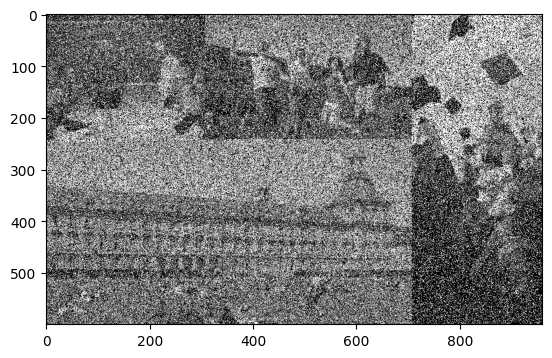

In [23]:
def add_salt_pepper_noise(img, salt_prob, pepper_prob):
    img_noisy = img.copy()
    salt = np.random.rand(*img.shape) < salt_prob
    pepper = np.random.rand(*img.shape) < pepper_prob
    img_noisy[salt] = 255
    img_noisy[pepper] = 0
    return img_noisy
img_noisy = add_salt_pepper_noise(img_gray, 0.3, 0.3)
display_image(img_noisy)

1000000 64.76858506944444
64.76858506944444 40.92748263888889
40.92748263888889 37.50572569444444
37.50572569444444 37.01458680555555
37.01458680555555 36.99861111111111
[9, 9]


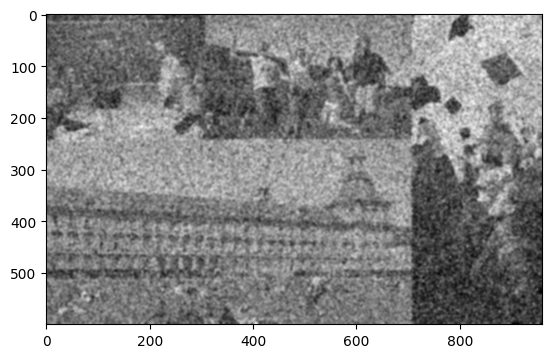

In [37]:
chosen_kernel = None
current_mean_gray_val_dist = 1000000
for size in ker_size:
    img_denoise_gaussian = cv2.GaussianBlur(img_noisy, size, 2)
    mean_gray_val_dist = np.mean(np.abs(img_gray.astype(np.int32) - img_denoise_gaussian.astype(np.int32)))
    print(current_mean_gray_val_dist, mean_gray_val_dist)
    if mean_gray_val_dist < current_mean_gray_val_dist:
        current_mean_gray_val_dist = mean_gray_val_dist
        chosen_kernel = size
img_denoise_gaussian = cv2.GaussianBlur(img_noisy, chosen_kernel, 2)
display_image(img_denoise_gaussian)
print(chosen_kernel)

[9, 9]


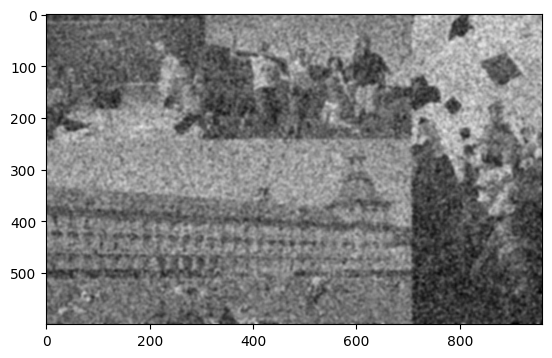

In [41]:
chosen_kernel = None
current_mean_gray_val_dist = 1000000
for size in ker_size:
    img_denosie_stackblur = cv2.stackBlur(img_noisy, size)
    mean_gray_val_dist = np.mean(np.abs(img_gray.astype(np.int32) - img_denosie_stackblur.astype(np.int32)))
    if mean_gray_val_dist < current_mean_gray_val_dist:
        current_mean_gray_val_dist = mean_gray_val_dist
        chosen_kernel = size
img_denosie_stackblur = cv2.stackBlur(img_noisy, chosen_kernel)
display_image(img_denosie_stackblur)
print(chosen_kernel)

[9, 9]


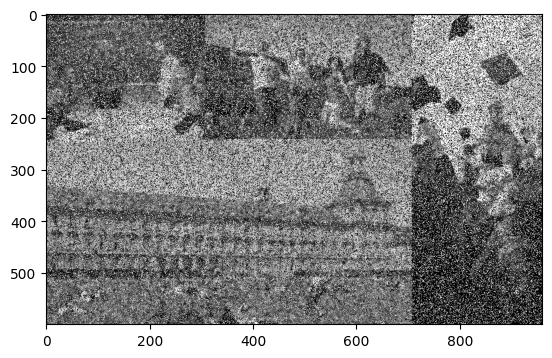

In [42]:
chosen_kernel = None
current_mean_gray_val_dist = 1000000
for size in ker_size:
    img_denoise_bilateral = cv2.bilateralFilter(img_noisy, size[0], 75, 75)
    mean_gray_val_dist = np.mean(np.abs(img_gray.astype(np.int32) - img_denoise_bilateral.astype(np.int32)))
    if mean_gray_val_dist < current_mean_gray_val_dist:
        current_mean_gray_val_dist = mean_gray_val_dist
        chosen_kernel = size
img_denoise_bilateral = cv2.bilateralFilter(img_noisy, chosen_kernel[0], 75, 75)
display_image(img_denoise_bilateral)
print(chosen_kernel)

# Ex 8

In [58]:
img = cv2.imread('./bonn.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [59]:
ker1 = np.array([[0.0113, 0.0838, 0.0113], 
                 [0.0838, 0.6193, 0.0838], 
                 [0.0113, 0.0838, 0.0113]])
ker2 = np.array([[-1.7497, 0.3426, 1.1530, -0.2524, 0.9813], 
                 [0.5142, 0.2211, -1.0700, -0.1894, 0.2550], 
                 [-0.4580, 0.4351, -0.5835, 0.8168, 0.6727], 
                 [0.1044, -0.5312, 1.0297, -0.4381, -1.1183], 
                 [1.6189, 1.5416, -0.2518, -0.8424, 0.1845]])

(3, 1) (1,) (1, 3)


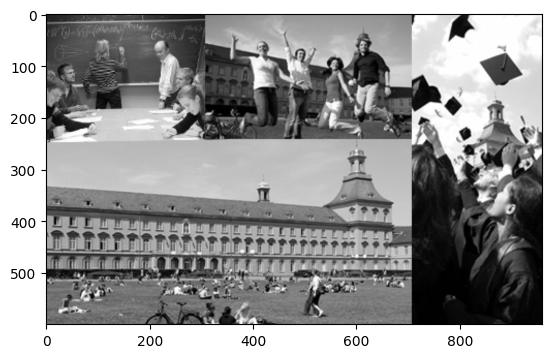

In [63]:
# get highest singular value of kernel
def low_rank_filter(img, kernel,rank):
    U, S, V = np.linalg.svd(kernel)
    rank = 1
    U = U[:, :rank]
    S = S[:rank]
    V = V[:rank, :]
    print(U.shape, S.shape, V.shape)
    kernel = U @ np.diag(S) @ V
    return cv2.filter2D(img, -1, kernel)
img_low_rank = low_rank_filter(img_gray, ker1, 1)
display_image(img_low_rank)

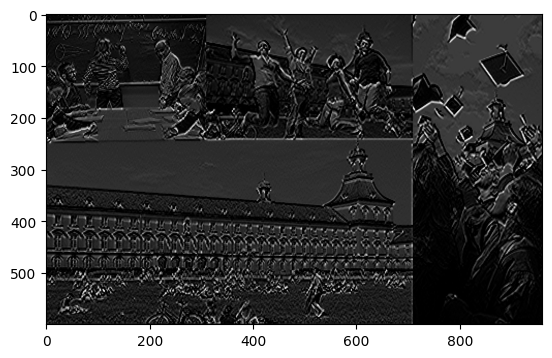

In [62]:
img_low_rank = low_rank_filter(img_gray, ker2, 2)
display_image(img_low_rank)